## Definição do Problema de Negócio

Customer Churn (ou Rotatividade de Clientes, em uma tradução livre)
refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento 
comercial. Refere-se também à perda de clientes. A fidelidade do cliente e a 
rotatividade de clientes sempre somam 100%. Se uma empresa tem uma taxa de 
fidelidade de 60%, então a taxa de perda de clientes é de 40%. De acordo com a 
regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da 
receita. Portanto, é muito importante prever os usuários que provavelmente 
abandonarão o relacionamento comercial e os fatores que afetam as decisões do 
cliente.
Neste projeto, deve-se prever o Customer Churn em uma Operadora de 
Telecom com um modelo de Regressão Logística, para extrair a informação se um cliente vai cancelar seu 
plano (Sim ou Não) e a probabilidade de uma opção ou outra.

## Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

%matplotlib inline
warnings.filterwarnings("ignore")

## Extraindo e Carregando os Dados

In [2]:
treino_df = pd.read_csv('projeto4_telecom_treino.csv', index_col=0)
teste_df = pd.read_csv('projeto4_telecom_teste.csv', index_col=0)

## Análise Exploratória de Dados

### Estatistica descritiva

In [3]:
#visualizacao das dimensoes
print(treino_df.shape)
print(teste_df.shape)

(3333, 20)
(1667, 20)


In [4]:
treino_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [5]:
treino_df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [6]:
treino_df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [7]:
#Verifica o total de variaveis nulas
treino_df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [8]:
#Obtem as colunas numericas para realizar as estatisticas
numericos = treino_df.select_dtypes(include = ['float64', 'int64'])

In [9]:
#Sumario estatistico
numericos.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
#copia o df para uma outra variavel
dados = treino_df.copy()

In [11]:
#Verifica dados duplicados
print('Total de duplicados: ', dados.duplicated().sum())

Total de duplicados:  0


#### Analise da variavel CHURN

In [12]:
dados.churn.value_counts()

no     2850
yes     483
Name: churn, dtype: int64

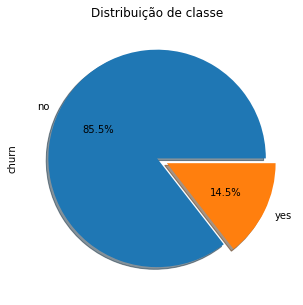

In [13]:
#Distribuicao das classes
figure, axes = plt.subplots(figsize = (10,5))
plt.title('Distribuição de classe')
dados.churn.value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=axes,shadow=True
)

In [14]:
#Rotatividade de clientes por estado
por_estado = dados.groupby(['state', 'churn']).size().reset_index(name = 'total').sort_values(by = ['total'])
por_estado.head()

,state,churn,total
1,AK,yes,3
25,IA,yes,3
23,HI,yes,3
37,LA,yes,4
7,AZ,yes,4


In [15]:
ativos = por_estado.loc[por_estado.churn == 'no'].sort_values(by = ['total'], ascending = False)

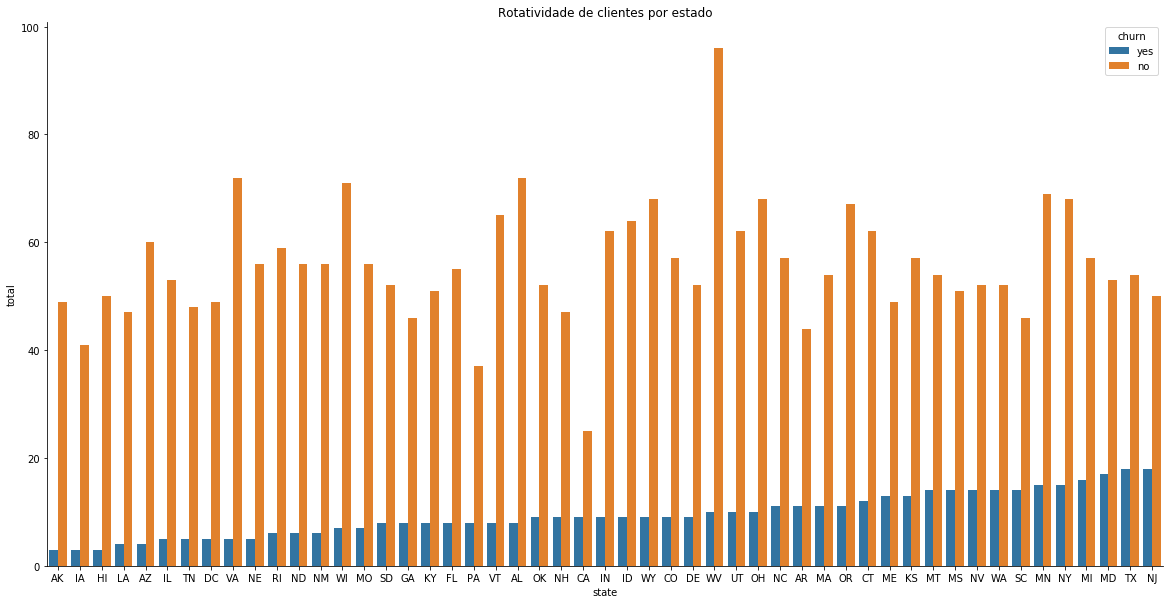

In [16]:
fig, ax1 = plt.subplots(figsize=(20,10))
sns.barplot(x='state', y='total', 
            hue='churn', data=por_estado, 
            ax=ax1).set_title('Rotatividade de clientes por estado')
sns.despine(fig)

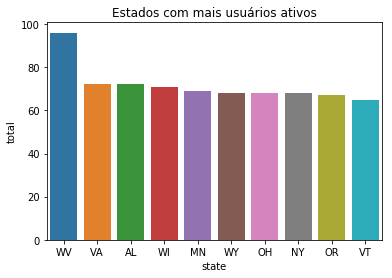

In [17]:
# Estados com mais usuarios que nao realizaram churn
sns.barplot(x = 'state', y = 'total', data = ativos.head(10)).set_title('Estados com mais usuários ativos')
sns.despine(fig)

Os estados NJ, TX, MD, MI e NY foram onde houveram mais perda de clientes. 
Os estados WV, VA, AL, WI e MN são os estados com maior quantidade de usuários ativos e com uma das menores perdas.

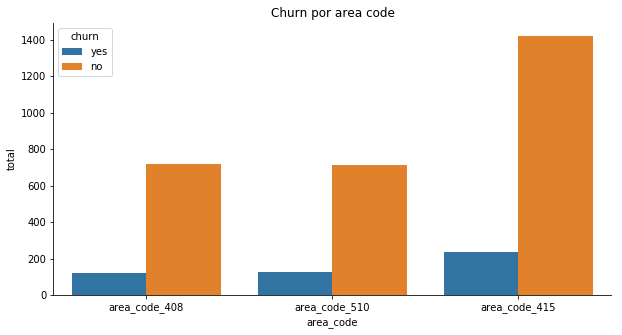

In [18]:
#Churn por codigo de area
por_area = dados.groupby(['area_code', 'churn']).size().reset_index(name = 'total').sort_values(by = ['total'])
fig, ax1 = plt.subplots(figsize=(10,5))
sns.barplot(x='area_code', y='total', hue='churn', data=por_area, ax=ax1).set_title('Churn por area code')
sns.despine(fig)

A area de codigo 415 possui a maior realização de churn.

In [19]:
medias = dados.groupby('churn').mean()
medias

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churn,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
yes,102.664596,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [20]:
medias = medias.reset_index().melt(id_vars='churn')

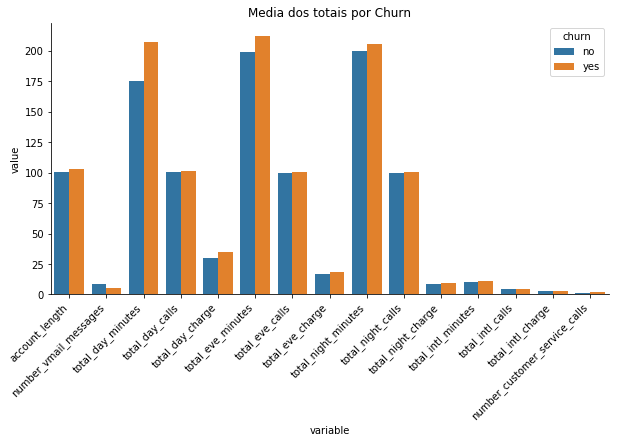

In [21]:
fig, ax1 = plt.subplots(figsize=(10,5))
plt.xticks(rotation=45, ha='right')
sns.barplot(data=medias, hue = 'churn', x = 'variable', y = 'value', ax=ax1).set_title('Media dos totais por Churn')
sns.despine(fig)

Para as variaveis account_length, total_day_minutes, total_eve_minutes e total_night minutes fica evidente um total maior para o grupo de pessoas que realizaram churn.

## Preparacao dos dados para o modelo preditivo

#### Feature engineering

In [22]:
#conversao para dummy
dados.international_plan = dados.international_plan.map(dict(yes = '1', no = '0'))
dados.voice_mail_plan = dados.voice_mail_plan.map(dict(yes = '1', no = '0'))
dados.churn = dados.churn.map(dict(yes = 1, no = 0))

#### Feature Selection

Alguns algoritmos como regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares). Por isso, removeremos essas variaveis do dataset

In [23]:
#Obtem-se a correlacao das variaveis, desestrutura para obter um df com 3 colunas e remove as linhas que apresentam a correlacao
#de uma variavel com ela mesma
corr = dados.corr().unstack().reset_index().query('level_0 != level_1')

#renomei as colunas
corr.columns  = ['var1', 'var2', 'correl']

#variaveis altamente correlacioandas
corr[corr.correl >= 0.95]

,var1,var2,correl
36,total_day_minutes,total_day_charge,1.000000
66,total_day_charge,total_day_minutes,1.000000
87,total_eve_minutes,total_eve_charge,1.000000
117,total_eve_charge,total_eve_minutes,1.000000
138,total_night_minutes,total_night_charge,0.999999
168,total_night_charge,total_night_minutes,0.999999
189,total_intl_minutes,total_intl_charge,0.999993
219,total_intl_charge,total_intl_minutes,0.999993


Removeremos as colunas total_day_charge, total_eve_charge, total_night_charge e total_intl_charge por serem colineares com total_day_minutes, total_eve_minutes, total_night_minutes, total_intl_minutes.

In [31]:
#Obtem as variaveis numericas para a Regressao Logistica e remove as colineares
colunas = ['state', 'area_code', 
           'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']

dados_corr = dados.drop(columns = colunas)

In [32]:
#separa a variavel target das preditoras
X_treino = dados_corr.drop(columns = 'churn')
Y_treino = dados_corr.churn

#### Normalização dos dados

Utilizaremos MinMaxScaler para normalizar os dados entre 0 e 1.

In [46]:
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X_treino)

#### Balanceamento das classes

Como vimos acima, existem muito mais registro para a não realização de churn, então sera realizado oversampling com a tecnica SMOTE. Para adicionar dados fictícios até as classes se igualarem.

In [47]:
smote = SMOTE()
X_sm, Y_sm = smote.fit_resample(rescaledX, Y_treino)

In [48]:
Y_sm.value_counts()

1    2850
0    2850
Name: churn, dtype: int64

#### Utilizacao de Regressão Logística para previsão dos dados

In [49]:
# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, X_sm, Y_sm, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 77.211


#### Ajuste de Hyperparametros

In [51]:
paramGrid = dict (
    penalty      = ['l1', 'l2'],
    C            = [0.001, 0.01, 0.05, 0.1, 0.15, 1, 10, 100],
    solver       = ['liblinear'],
    tol          = [0.0001, 0.0005],
    max_iter     = [13, 15, 30, 50, 100],
    class_weight = ['balanced', None]
)

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid, para fazer a busca dos melhores parâmetros para o modelo.
grid = GridSearchCV(estimator = modelo, param_grid = paramGrid)

grid.fit(X_sm, Y_sm)

# Print do resultado
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 77.404
Melhores Parâmetros do Modelo:
 LogisticRegression(C=10, class_weight='balanced', max_iter=15, penalty='l1',
                   solver='liblinear')


#### Aplica as modificações na variavel de treino na variavel teste

In [52]:
#selecao de features
dados_teste = teste_df.drop(columns = colunas)

#conversao para dummy
dados_teste.international_plan = dados_teste.international_plan.map(dict(yes = 1, no = 0))
dados_teste.voice_mail_plan = dados_teste.voice_mail_plan.map(dict(yes = 1, no = 0))
dados_teste.churn = dados_teste.churn.map(dict(yes = 1, no = 0))

#Separa a variavel target
X_teste = dados_teste.drop(columns = 'churn')
Y_teste = dados_teste.churn

In [54]:
#Criacao da Pipeline
modelo = grid.best_estimator_
modelo.fit(X_sm, Y_sm)

pipe = Pipeline([('scaler', scaler),('LR', modelo)] )

In [55]:
predict = pipe.predict(X_teste)

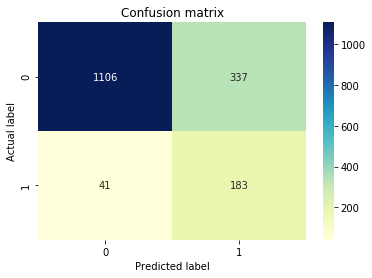


              precision    recall  f1-score   support

           0       0.96      0.77      0.85      1443
           1       0.35      0.82      0.49       224

    accuracy                           0.77      1667
   macro avg       0.66      0.79      0.67      1667
weighted avg       0.88      0.77      0.81      1667



In [56]:
cnf_matrix = confusion_matrix(Y_teste, predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print()
print(classification_report(Y_teste, predict))

In [57]:
#probabilidades
pred_prob = pipe.predict_proba(X_teste)
pred_prob

array([[0.67636574, 0.32363426],
       [0.8037929 , 0.1962071 ],
       [0.38085133, 0.61914867],
       ...,
       [0.80538511, 0.19461489],
       [0.8947662 , 0.1052338 ],
       [0.98173196, 0.01826804]])

In [58]:
pred_label = pd.Series(predict).map(lambda x: 'yes' if x == 1 else 'no')

In [59]:
final = teste_df.copy()
final['previsao'] = pred_label
final['prob_no_churn'] = pred_prob[:,0]
final['prob_yes_churn'] = pred_prob[:,1]
final[['churn', 'previsao', 'prob_no_churn', 'prob_yes_churn']].head(15)

,churn,previsao,prob_no_churn,prob_yes_churn
1,no,no,0.676366,0.323634
2,no,yes,0.803793,0.196207
3,no,no,0.380851,0.619149
4,no,no,0.549722,0.450278
5,no,no,0.723697,0.276303
6,no,no,0.767727,0.232273
7,no,no,0.598831,0.401169
8,no,no,0.802282,0.197718
9,no,no,0.902859,0.097141
10,no,no,0.867849,0.132151


In [60]:
final.to_csv('resultado_previsoes.csv', index = False)